<h1>Extracting Stock Data Using a Python Library</h1>


In [1]:
#!pip install yfinance
#!pip install pandas

In [40]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## Extracting Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock.

### Stock Info


Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [115]:
def stock_details(instrument):
    inst_data = yf.Ticker(instrument)
    inst_info = inst_data.info
    shares = inst_data.history(period="max")
    shares.reset_index(inplace=True)
    inst_name = inst_info["shortName"]
    print(f"{instrument} - {inst_name}")
    recomm = inst_info["recommendationKey"]
    current_price = inst_info["currentPrice"]
    currency = inst_info['currency']
    max_price = inst_info["targetHighPrice"]
    mean_price = inst_info["targetMeanPrice"]
    min_price = inst_info["targetLowPrice"]
    print(f"Current Price: {current_price} {currency}")
    print(f"Max Target Price: {max_price} {currency}")
    print(f"Mean Target Price: {mean_price} {currency}")
    print(f"Min Target Price: {min_price} {currency}")
    print(f"Recommendation: {recomm}")
    shares.plot(x="Date", y="Open")
    plt.title(instrument)
    plt.ylabel("share price")
    plt.xticks(rotation = 30)
    plt.show()
    shares.plot(x="Date", y="Volume")
    plt.title(instrument)
    plt.ylabel("Volume Traded")
    plt.xticks(rotation = 30)
    plt.show()
    inst_desc = inst_info["longBusinessSummary"]
    print(f"Business Summary: {inst_desc}")
    

MRNA - Moderna, Inc.
Current Price: 340.5301 USD
Max Target Price: 490 USD
Mean Target Price: 304.92 USD
Min Target Price: 86 USD
Recommendation: hold


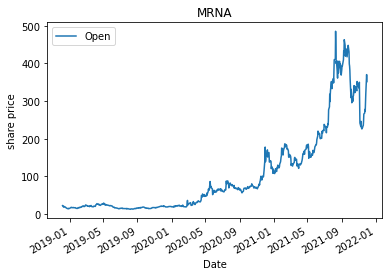

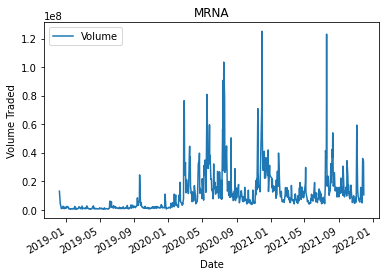

Business Summary: Moderna, Inc., a biotechnology company, develops therapeutics and vaccines based on messenger RNA for the treatment of infectious diseases, immuno-oncology, rare diseases, cardiovascular diseases, and auto-immune diseases. As of March 9, 2021, the company had 13 programs in clinical trials and a total of 24 development programs in six modalities comprising prophylactic vaccines, cancer vaccines, intratumoral immuno-oncology, localized regenerative therapeutics, systemic secreted and cell surface therapeutics, and systemic intracellular therapeutics. The company has strategic alliances with AstraZeneca PLC, Merck & Co., Inc., Vertex Pharmaceuticals Incorporated, Vertex Pharmaceuticals (Europe) Limited, the Biomedical Advanced Research and Development Authority, the Defense Advanced Research Projects Agency, the National Institute of Allergy and Infectious Diseases, the National Institutes of Health, the Coalition for Epidemic Preparedness Innovations, Metagenomi, Inc.,

In [116]:
stock_details("MRNA")